# Sktime, ARIMA, SARIMA, AutoARIMA & Pipeline
> Author: Haytham Omar

In [1]:
import warnings
import itertools


In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [75]:
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(12,6)})


In [76]:
time_series= pd.read_csv('timeseries.csv',parse_dates=True)
time_series.info()
time_series['date']= pd.to_datetime(time_series['date'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     121 non-null    int64  
 1   week           121 non-null    int64  
 2   month          121 non-null    int64  
 3   year           121 non-null    int64  
 4   date           121 non-null    object 
 5   total_revenue  121 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.8+ KB


In [77]:
time_series.head()

,Unnamed: 0,week,month,year,date,total_revenue
0,113,49,12,2009,2009-12-01,232177.51
1,116,50,12,2009,2009-12-07,207908.73
2,118,51,12,2009,2009-12-14,207685.87
3,120,52,12,2009,2009-12-21,35731.90
4,0,1,1,2010,2010-01-04,167636.95


<AxesSubplot: xlabel='date'>

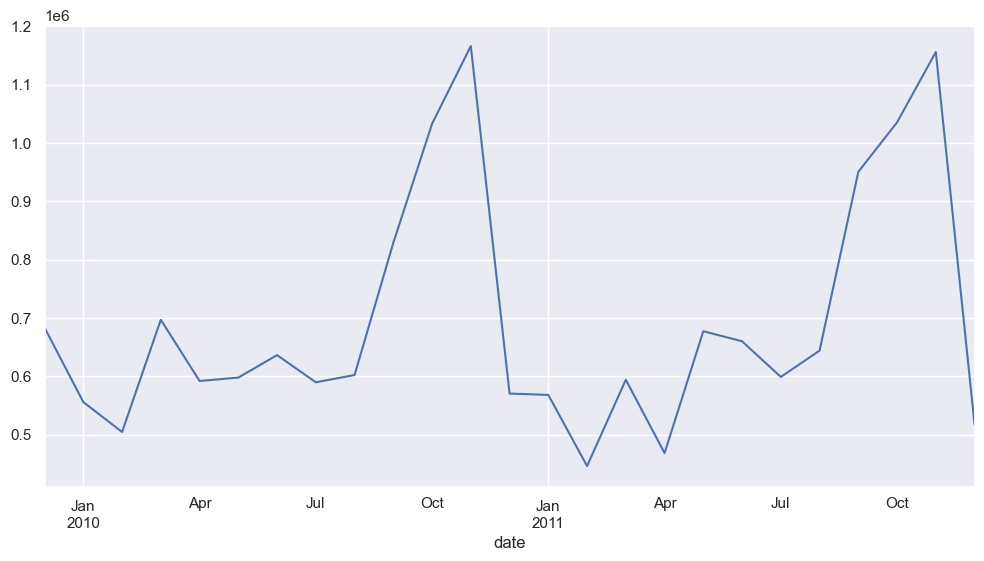

In [78]:

time_series= time_series.set_index('date')
monthly_series= time_series.total_revenue.resample('M').sum()

monthly_series.plot()


In [79]:
monthly_series.head()

date
2009-12-31    683504.010
2010-01-31    555802.672
2010-02-28    504558.956
2010-03-31    696978.471
2010-04-30    591982.002
Freq: M, Name: total_revenue, dtype: float64

In [80]:
from pylab import rcParams
rcParams['figure.figsize']=16,8


components= sm.tsa.seasonal_decompose(monthly_series)


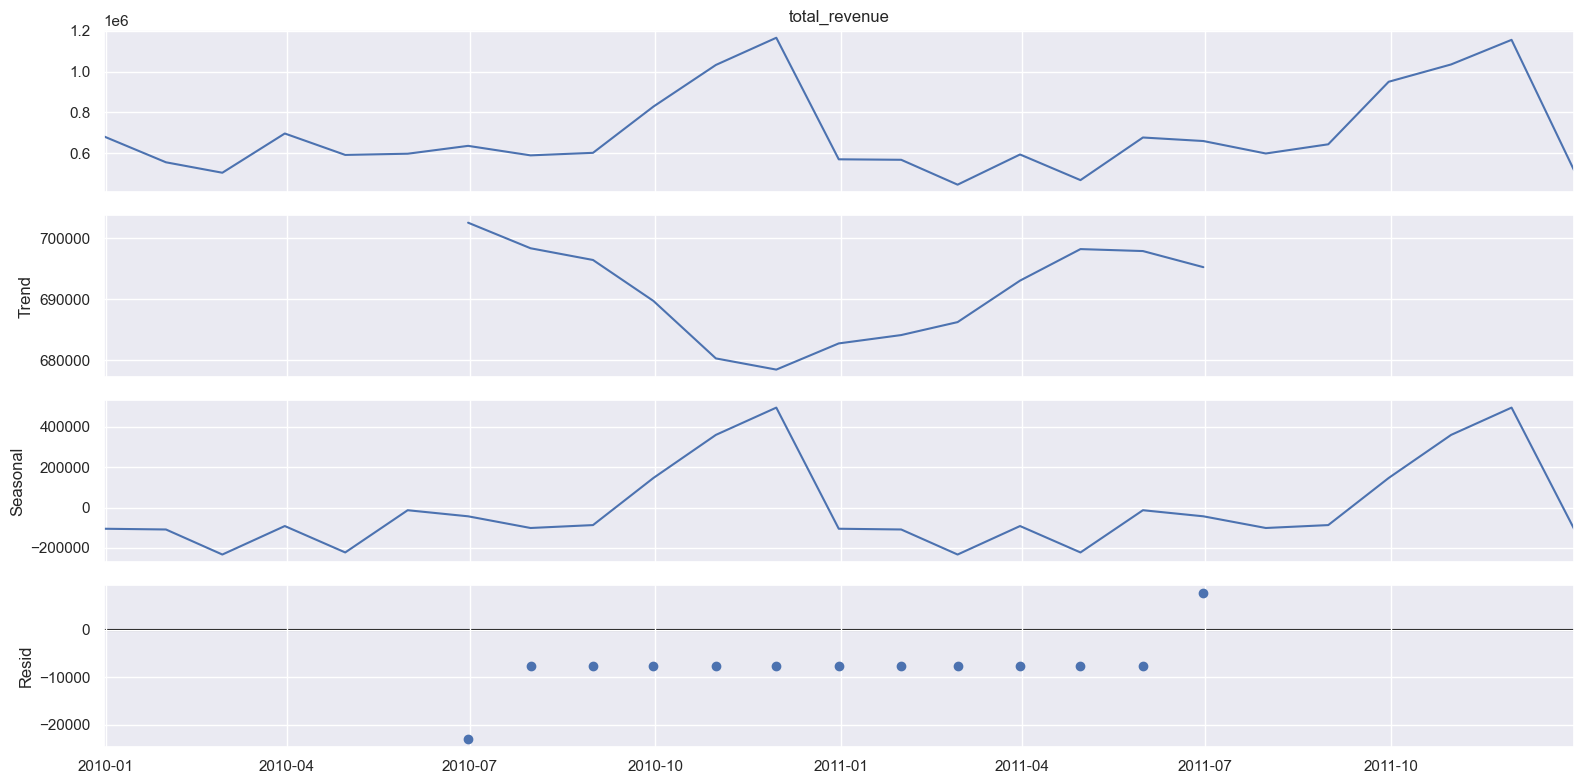

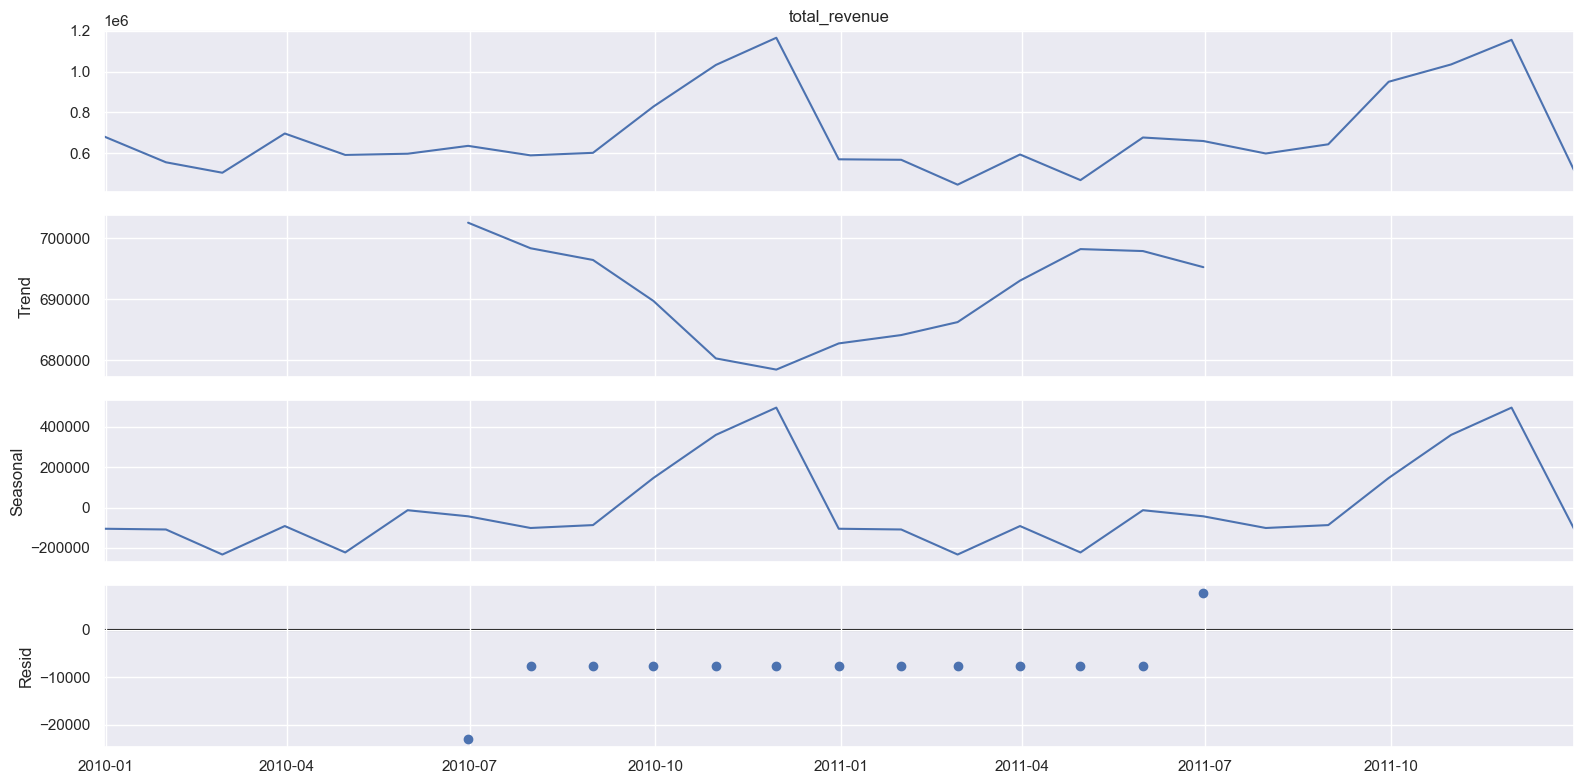

In [81]:
components.plot()

In [11]:
###### MA model

model_ma= sm.tsa.statespace.SARIMAX(monthly_series,order= (0,0,1))
results_ma= model_ma.fit()
results_ma.aic


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49183D+01    |proj g|=  1.08015D+00

At iterate    5    f=  1.45827D+01    |proj g|=  8.00963D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      6      1     0     0   8.010D-07   1.458D+01
  F =   14.582721229639469     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


733.1360614819735

In [12]:
model_AR= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,0,0))
results_AR= model_AR.fit()

results_AR.aic


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37513D+01    |proj g|=  3.24542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   1.244D-06   1.375D+01
  F =   13.751268417102303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


691.5634208551152

In [13]:
model_ARma= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,0,1))
results_ARma= model_ARma.fit()

results_ARma.aic

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37492D+01    |proj g|=  2.89912D-02

At iterate    5    f=  1.37480D+01    |proj g|=  5.52276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   5.163D-06   1.375D+01
  F =   13.747872175955985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


693.3936087977993

In [14]:

model_ARima= sm.tsa.statespace.SARIMAX(monthly_series,order= (1,1,1))
results_ARima= model_ARima.fit()
results_ARima.aic

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31730D+01    |proj g|=  1.63933D-01

At iterate    5    f=  1.31531D+01    |proj g|=  9.66280D-02

At iterate   10    f=  1.31204D+01    |proj g|=  1.71991D-02

At iterate   15    f=  1.31175D+01    |proj g|=  6.32596D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   6.326D-06   1.312D+01
  F =   13.117524267022445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


661.8762133511223

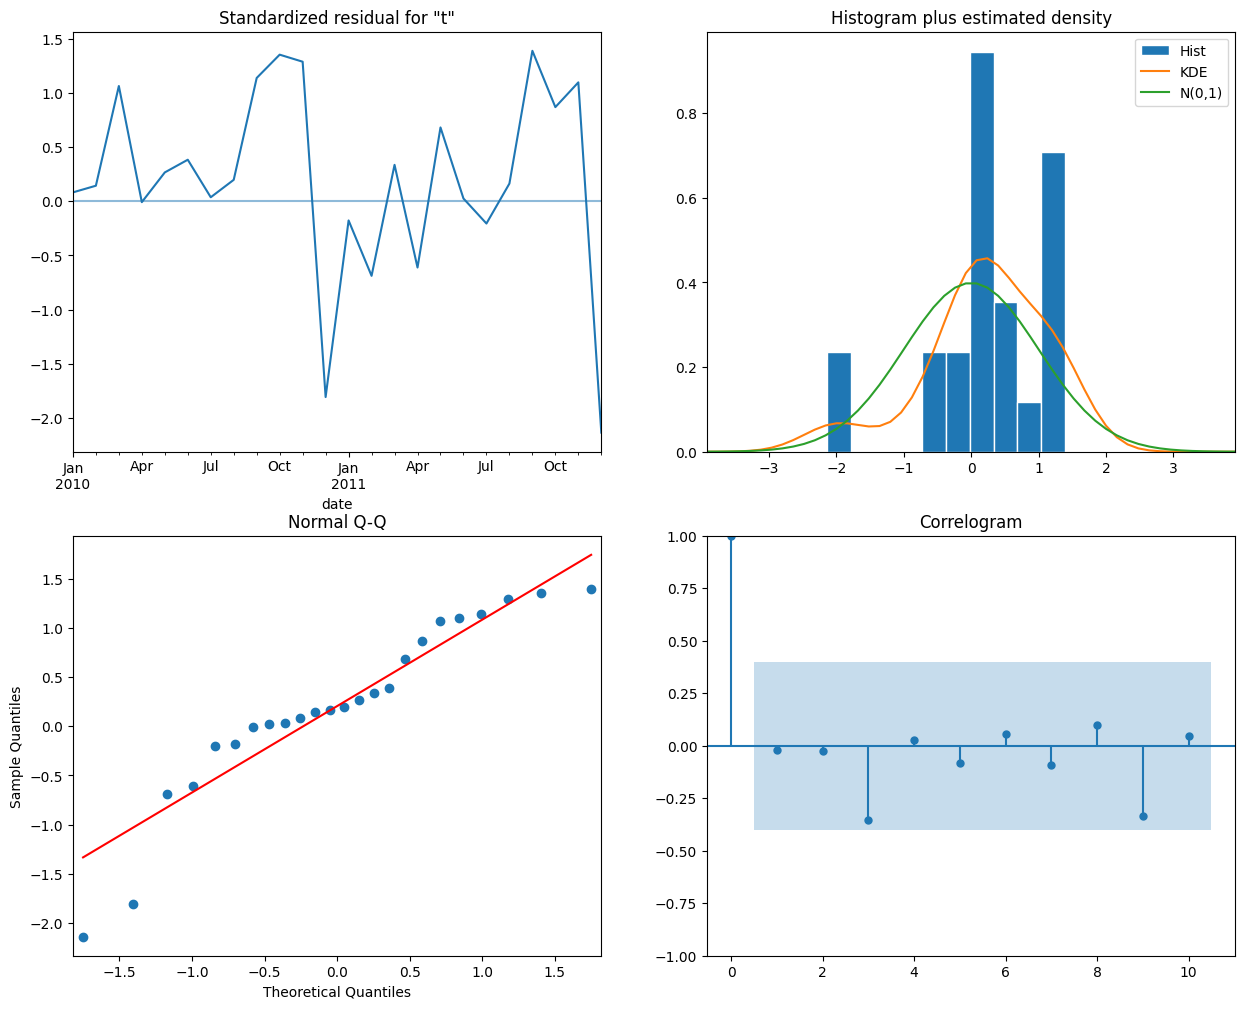

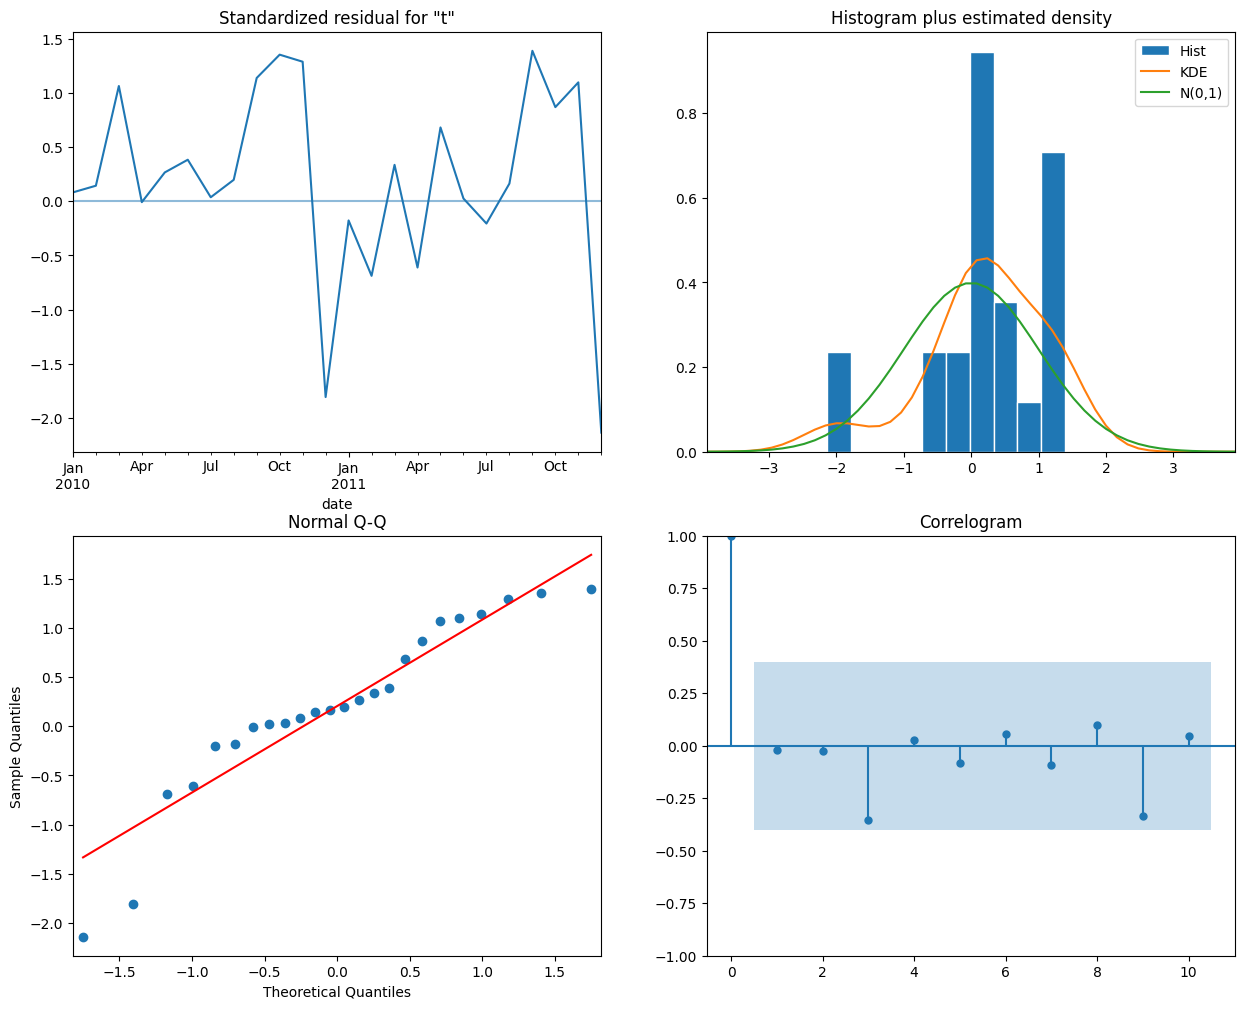

In [15]:
results_ARima.plot_diagnostics(figsize=(15, 12))


In [16]:
###### getting the best orders
import itertools       
           
P=D=Q=p=d=q= range(0,3)
S= 12
combinations= list(itertools.product(p,d,q,P,D,Q))
len(combinations)

                              

729

In [17]:
combinations

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 2),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 1, 2),
 (0, 0, 0, 0, 2, 0),
 (0, 0, 0, 0, 2, 1),
 (0, 0, 0, 0, 2, 2),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 2),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 2),
 (0, 0, 0, 1, 2, 0),
 (0, 0, 0, 1, 2, 1),
 (0, 0, 0, 1, 2, 2),
 (0, 0, 0, 2, 0, 0),
 (0, 0, 0, 2, 0, 1),
 (0, 0, 0, 2, 0, 2),
 (0, 0, 0, 2, 1, 0),
 (0, 0, 0, 2, 1, 1),
 (0, 0, 0, 2, 1, 2),
 (0, 0, 0, 2, 2, 0),
 (0, 0, 0, 2, 2, 1),
 (0, 0, 0, 2, 2, 2),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 0, 2),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 0, 1, 2),
 (0, 0, 1, 0, 2, 0),
 (0, 0, 1, 0, 2, 1),
 (0, 0, 1, 0, 2, 2),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 0, 2),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 0, 1, 1, 1, 2),
 (0, 0, 1, 1, 2, 0),
 (0, 0, 1, 1, 2, 1),
 (0, 0, 1, 1, 2, 2),
 (0, 0, 1, 2, 0, 0),
 (0, 0, 1, 2, 0, 1),
 (0, 0, 1, 2,

In [1]:
"""arima_orders=[(x[0],x[1],x[2]) for x in combinations]
seasonal_orders=[(x[3],x[4],x[5],S) for x in combinations]

results_data= pd.DataFrame(columns=['p','d','q','P','D','Q','AIC'])

### length of combinatioons

len(combinations) 

for i in range(len(combinations)):
     try:
      
          model = sm.tsa.statespace.SARIMAX(monthly_series,order=arima_orders[i],
                                        seasonal_order= seasonal_orders[i]
                                       )
          result= model.fit()
          results_data.loc[i,'p']= arima_orders[i][0]
          results_data.loc[i,'d']= arima_orders[i][1]
          results_data.loc[i,'q']= arima_orders[i][2]
          results_data.loc[i,'P']= seasonal_orders[i][0]
          results_data.loc[i,'D']= seasonal_orders[i][1]
          results_data.loc[i,'Q']= seasonal_orders[i][2]
          results_data.loc[i,'AIC']= result.aic
     except:
          continue
      """

"arima_orders=[(x[0],x[1],x[2]) for x in combinations]\nseasonal_orders=[(x[3],x[4],x[5],S) for x in combinations]\n\nresults_data= pd.DataFrame(columns=['p','d','q','P','D','Q','AIC'])\n\n### length of combinatioons\n\nlen(combinations) \n\nfor i in range(len(combinations)):\n     try:\n      \n          model = sm.tsa.statespace.SARIMAX(monthly_series,order=arima_orders[i],\n                                        seasonal_order= seasonal_orders[i]\n                                       )\n          result= model.fit()\n          results_data.loc[i,'p']= arima_orders[i][0]\n          results_data.loc[i,'d']= arima_orders[i][1]\n          results_data.loc[i,'q']= arima_orders[i][2]\n          results_data.loc[i,'P']= seasonal_orders[i][0]\n          results_data.loc[i,'D']= seasonal_orders[i][1]\n          results_data.loc[i,'Q']= seasonal_orders[i][2]\n          results_data.loc[i,'AIC']= result.aic\n     except:\n          continue\n      "

In [3]:
#results_data[results_data.AIC == min(results_data.AIC)]     
     


In [6]:
"""best_model= sm.tsa.statespace.SARIMAX(monthly_series,order=(0,1,0),
                                      seasonal_order= (0,2,0,12))"""

'best_model= sm.tsa.statespace.SARIMAX(monthly_series,order=(0,1,0),\n                                      seasonal_order= (0,2,0,12))'

In [20]:
results=  best_model.fit()


fitting= results.get_prediction(start= '2009-12-31')
fitting_mean= fitting.predicted_mean


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:1234: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /


In [21]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      total_revenue   No. Observations:                   25
Model:             SARIMAX(0, 1, 0)x(0, 2, 0, 12)   Log Likelihood                   0.000
Date:                            Wed, 08 Feb 2023   AIC                              2.000
Time:                                    22:03:57   BIC                               -inf
Sample:                                12-31-2009   HQIC                               nan
                                     - 12-31-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10        nan        nan        nan         nan         nan
Ljung-Box (L1) (Q):                

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/eval_measures.py:406: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/eval_measures.py:431: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tools/eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:467: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [22]:
forecast= results.get_forecast(steps=12)
forecast_mean= forecast.predicted_mean


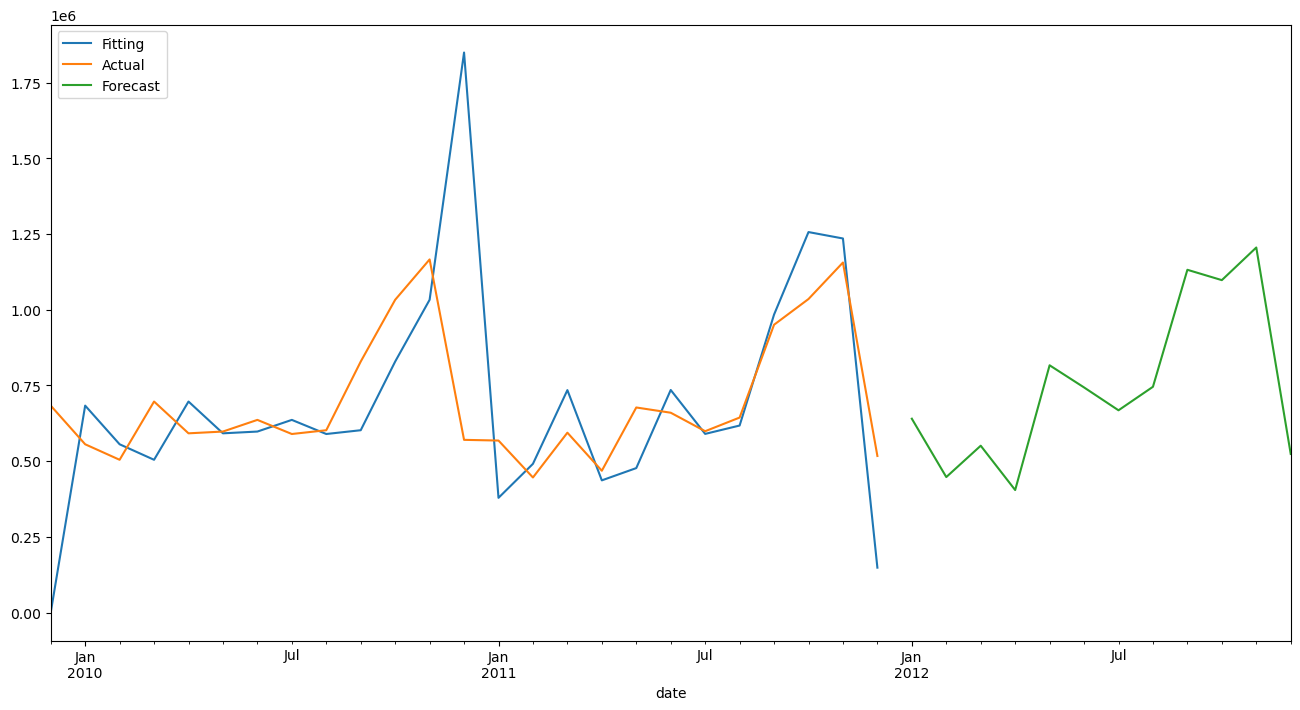

In [27]:
fitting_mean.plot(label='Fitting')
monthly_series.plot(label='Actual')
forecast_mean.plot(label='Forecast')
plt.legend(loc='upper left')


In [12]:
from statsmodels.tsa import holtwinters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [13]:
model_expo1= holtwinters.ExponentialSmoothing(monthly_series,trend='add',
                                                     seasonal='add',seasonal_periods=12)
model_expo2= holtwinters.ExponentialSmoothing(monthly_series,trend='mul',
                                                     seasonal='add',seasonal_periods=12)
model_expo3= holtwinters.ExponentialSmoothing(monthly_series,trend='add',
                                                     seasonal='mul',seasonal_periods=12)

model_expo4= holtwinters.ExponentialSmoothing(monthly_series,trend='mul',
                                                     seasonal='mul',seasonal_periods=12)

ses= SimpleExpSmoothing(monthly_series, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)

holt= Holt(monthly_series, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

results_1= model_expo1.fit()
results_2= model_expo2.fit()
results_3= model_expo3.fit()
results_4= model_expo4.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [17]:
fit1= model_expo1.fit().predict(0,len(monthly_series))
fit2= model_expo2.fit().predict(0,len(monthly_series))
fit3= model_expo3.fit().predict(0,len(monthly_series))
fit4= model_expo4.fit().predict(0,len(monthly_series))
fit5= ses.predict(0,len(monthly_series))
fit6= holt.predict(0,len(monthly_series))


mae1= round(abs(monthly_series- fit1).mean())
mae2= round(abs(monthly_series- fit2).mean())
mae3= round(abs(monthly_series- fit3).mean())
mae4= round(abs(monthly_series- fit4).mean())
mae5= round(abs(monthly_series- fit5).mean())
mae6= round(abs(monthly_series- fit6).mean())


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [18]:
{'add_add':mae1,'mul_add':mae2,'add_mul':mae3,'mul_mul':mae4,'ses':mae5,'holt':mae6}


{'add_add': 36217,
 'mul_add': 36208,
 'add_mul': 37966,
 'mul_mul': 37961,
 'ses': 159180,
 'holt': 156639}

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


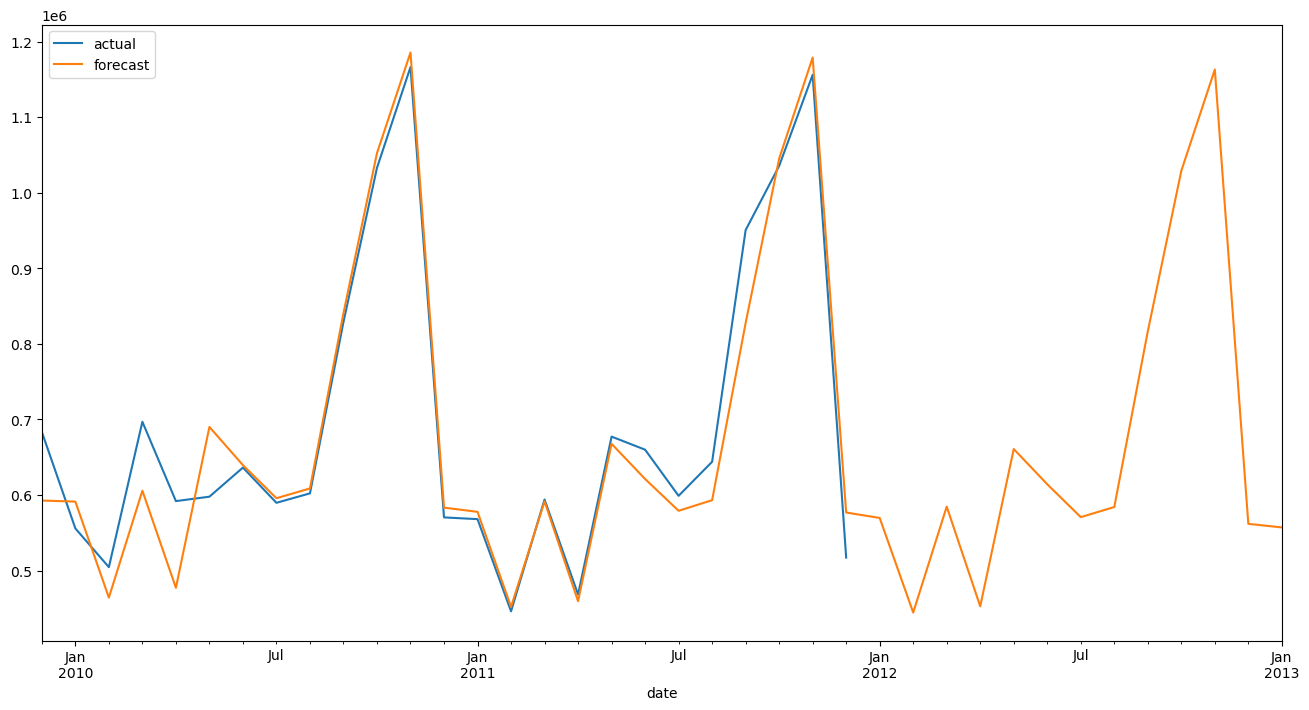

In [22]:
forecast=model_expo2.fit().predict(0,len(monthly_series)+12)

monthly_series.plot(label='actual')
forecast.plot(label='forecast')
plt.legend(loc='upper left')



In [25]:
ma_data= time_series[['total_revenue']]

In [26]:
ma_data['set']='train'
ma_data.loc['2011','set']='test'

/var/folders/25/6d_dng7s7d9c9vbyh1zlf3bm0000gn/T/ipykernel_5188/374527139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data['set']='train'


In [27]:
ma_data

,total_revenue,set
date,,
2009-12-01,232177.51,train
2009-12-07,207908.73,train
2009-12-14,207685.87,train
2009-12-21,35731.90,train
2010-01-04,167636.95,train
...,...,...
2011-11-14,276216.98,test
2011-11-21,248234.58,test
2011-11-28,141669.57,test


In [28]:
ma_data['rolling_5']= ma_data.total_revenue.shift().rolling(5).mean()
ma_data['rolling_3']= ma_data.total_revenue.shift().rolling(3).mean()

/var/folders/25/6d_dng7s7d9c9vbyh1zlf3bm0000gn/T/ipykernel_5188/139581757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data['rolling_5']= ma_data.total_revenue.shift().rolling(5).mean()
/var/folders/25/6d_dng7s7d9c9vbyh1zlf3bm0000gn/T/ipykernel_5188/139581757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data['rolling_3']= ma_data.total_revenue.shift().rolling(3).mean()


<AxesSubplot: xlabel='date'>

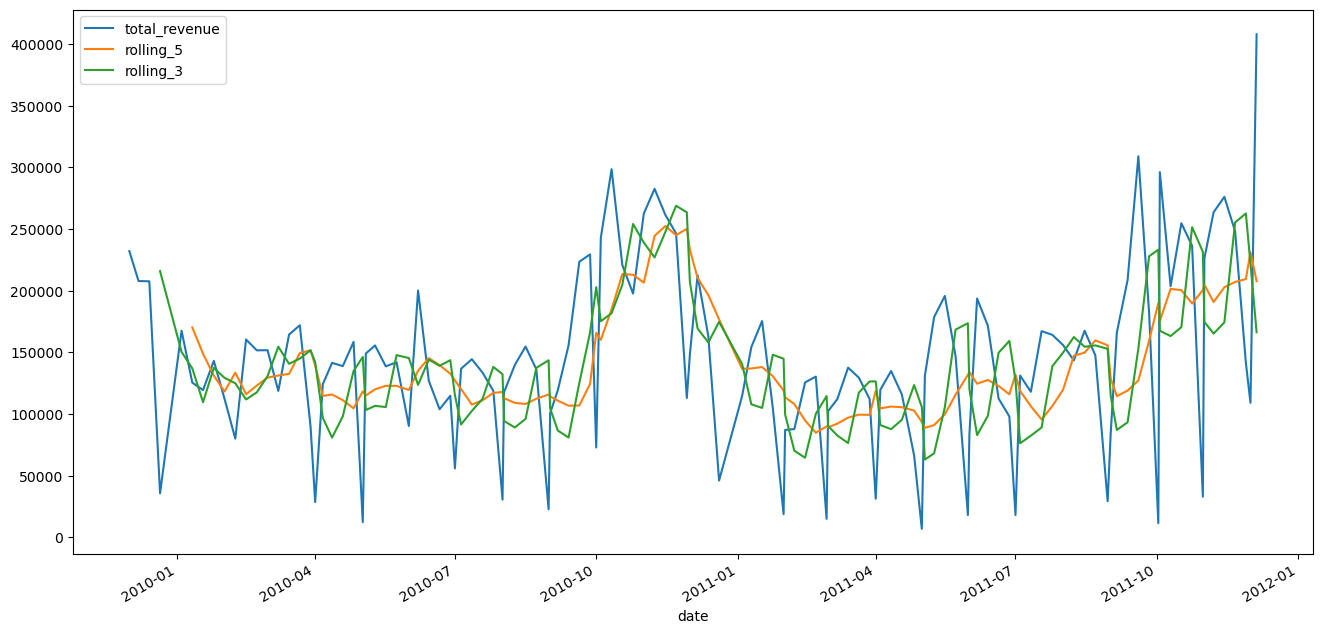

In [29]:
ma_data.plot()

In [30]:
ma_data.round().tail()

,total_revenue,set,rolling_5,rolling_3
date,,,,
2011-11-14,276217.0,test,202865.0,174364.0
2011-11-21,248235.0,test,207153.0,255434.0
2011-11-28,141670.0,test,209509.0,262723.0
2011-12-01,109163.0,test,231241.0,222040.0
2011-12-05,408045.0,test,207800.0,166356.0


In [31]:
import numpy as np

In [33]:
test_set= ma_data[ma_data.set== 'test']

In [38]:
mae_r5=np.mean(abs(test_set.total_revenue- test_set.rolling_5))
mae_r3=np.mean(abs(test_set.total_revenue- test_set.rolling_3))

In [39]:
mse_r5=np.mean((test_set.total_revenue- test_set.rolling_5)**2)
mse_r3=np.mean((test_set.total_revenue- test_set.rolling_3)**2)

In [40]:
rmse_r5=np.sqrt(np.mean((test_set.total_revenue- test_set.rolling_5)**2))
rmse_r3=np.sqrt(np.mean((test_set.total_revenue- test_set.rolling_3)**2))

In [41]:
{'mae_r5':mae_r5,'mae_r3':mae_r3,'mse_r5':mse_r5,'mse_r3':mse_r3,'rmse_r5':rmse_r5,'rmse_r3':rmse_r3}

{'mae_r5': 57070.7566915255,
 'mae_r3': 69453.79201129956,
 'mse_r5': 5486058202.987317,
 'mse_r3': 7687142220.020162,
 'rmse_r5': 74067.92965236248,
 'rmse_r3': 87676.34926261564}

In [82]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import seaborn as sns
from sktime.forecasting.base import ForecastingHorizon

sns.set(rc={'figure.figsize':(12,6)})

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction

#from lightgbm import LGBMRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.ets import AutoETS
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
#import xgboost as xgb
from lightgbm import LGBMRegressor
import pandas as pd
import datetime
from sktime.forecasting.compose import ForecastingPipeline
from sktime.forecasting.model_selection import (
 
    ForecastingGridSearchCV,
   ExpandingWindowSplitter,SlidingWindowSplitter)
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError
import numpy as np
from sktime.transformations.series.summarize import WindowSummarizer
from sktime.forecasting.model_evaluation import evaluate
from sktime.transformations.series.impute import Imputer
#import xgboost as xgb
#from xgboost import XGBClassifier

In [108]:
regression= pd.read_csv('regression.csv')

In [109]:
regression['Week']= pd.to_datetime(regression['Week'],format='%m/%d/%y')

In [110]:
regression['Sales']= regression['Sales'].str.replace(',','')

In [111]:
regression['Sales']= pd.to_numeric(regression['Sales'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


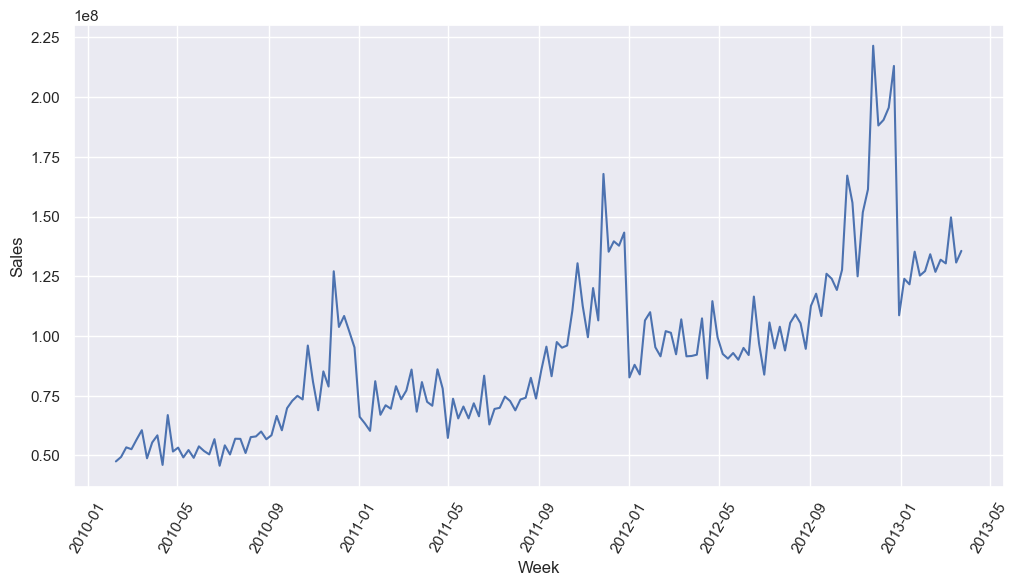

In [112]:
import matplotlib.pyplot as plt
sns.lineplot(x='Week',y='Sales',data=regression)
plt.xticks(rotation=60)
plt.show()

In [113]:
regression['trend']= range(regression.shape[0])

In [114]:
forecaster = AutoARIMA(sp=52)
regressor = LinearRegression()
forecaster1 = make_reduction(estimator=regressor, strategy='recursive', window_length=4)
lgb= LGBMRegressor()
forecaster2 = make_reduction(estimator=lgb, strategy='recursive', window_length=4)

In [115]:
regression['Week'] = pd.PeriodIndex(regression['Week'], freq='W').to_timestamp()
regression = regression.set_index('Week').to_period("W")


In [116]:
regression['month']=regression['month'].astype('category')
regression=pd.get_dummies(regression)

In [117]:
y= regression['Sales']

In [118]:
x=regression.loc[:,'Promos':]

In [119]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y, x, test_size=30)


Week
2010-02-01/2010-02-07     47500886
2010-02-08/2010-02-14     49373641
2010-02-15/2010-02-21     53390280
2010-02-22/2010-02-28     52616149
2010-03-01/2010-03-07     56698808
                           ...    
2012-07-23/2012-07-29     93932079
2012-07-30/2012-08-05    105477415
2012-08-06/2012-08-12    109022523
2012-08-13/2012-08-19    105341703
2012-08-20/2012-08-26     94626782
Freq: W-SUN, Name: Sales, Length: 134, dtype: int64

In [121]:
forecaster.fit(y_train)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few ob

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

AutoARIMA(sp=52)

In [122]:
forecaster1.fit(y_train,X_train)

RecursiveTabularRegressionForecaster(estimator=LinearRegression(),
                                     window_length=4)

In [123]:
forecaster2.fit(y_train,X_train)

RecursiveTabularRegressionForecaster(estimator=LGBMRegressor(), window_length=4)

In [124]:
fh_abs = ForecastingHorizon(y_test.index, is_relative=False) 


In [125]:
y_train.index

PeriodIndex(['2010-02-01/2010-02-07', '2010-02-08/2010-02-14',
             '2010-02-15/2010-02-21', '2010-02-22/2010-02-28',
             '2010-03-01/2010-03-07', '2010-03-08/2010-03-14',
             '2010-03-15/2010-03-21', '2010-03-22/2010-03-28',
             '2010-03-29/2010-04-04', '2010-04-05/2010-04-11',
             ...
             '2012-06-18/2012-06-24', '2012-06-25/2012-07-01',
             '2012-07-02/2012-07-08', '2012-07-09/2012-07-15',
             '2012-07-16/2012-07-22', '2012-07-23/2012-07-29',
             '2012-07-30/2012-08-05', '2012-08-06/2012-08-12',
             '2012-08-13/2012-08-19', '2012-08-20/2012-08-26'],
            dtype='period[W-SUN]', name='Week', length=134)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

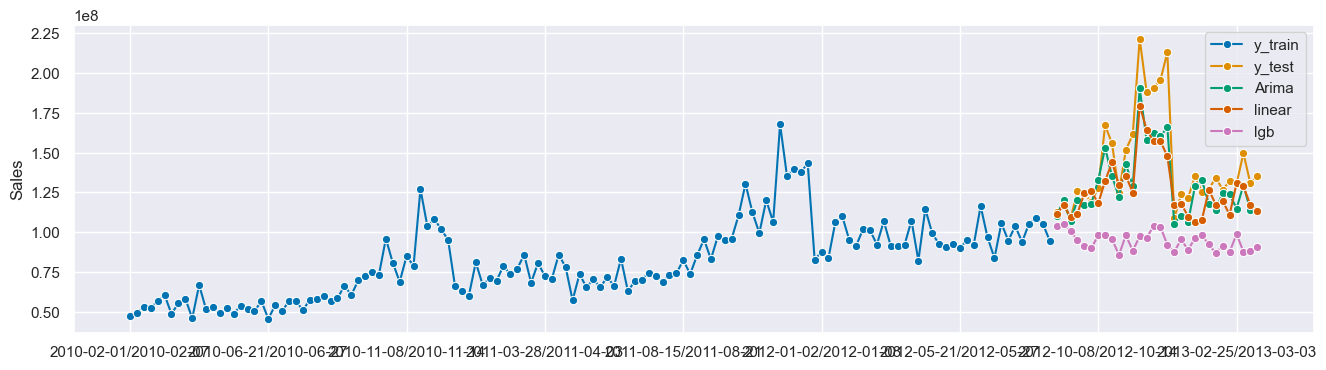

In [126]:
y_pred = forecaster.predict(X=X_test, fh=fh_abs)
y_pred1 = forecaster1.predict(X=X_test, fh=fh_abs)
y_pred2 = forecaster2.predict(X=X_test, fh=fh_abs)

plot_series(y_train, y_test, y_pred, y_pred1 ,y_pred2,labels=["y_train", "y_test", "Arima",'linear','lgb']);

In [127]:
y_pred

2012-08-27/2012-09-02    1.105066e+08
2012-09-03/2012-09-09    1.200518e+08
2012-09-10/2012-09-16    1.071330e+08
2012-09-17/2012-09-23    1.202987e+08
2012-09-24/2012-09-30    1.172878e+08
2012-10-01/2012-10-07    1.180134e+08
2012-10-08/2012-10-14    1.327484e+08
2012-10-15/2012-10-21    1.528924e+08
2012-10-22/2012-10-28    1.352361e+08
2012-10-29/2012-11-04    1.222280e+08
2012-11-05/2012-11-11    1.427777e+08
2012-11-12/2012-11-18    1.291628e+08
2012-11-19/2012-11-25    1.904054e+08
2012-11-26/2012-12-02    1.578153e+08
2012-12-03/2012-12-09    1.621777e+08
2012-12-10/2012-12-16    1.603684e+08
2012-12-17/2012-12-23    1.658759e+08
2012-12-24/2012-12-30    1.052542e+08
2012-12-31/2013-01-06    1.105387e+08
2013-01-07/2013-01-13    1.064936e+08
2013-01-14/2013-01-20    1.290861e+08
2013-01-21/2013-01-27    1.325493e+08
2013-01-28/2013-02-03    1.178761e+08
2013-02-04/2013-02-10    1.140719e+08
2013-02-11/2013-02-17    1.246153e+08
2013-02-18/2013-02-24    1.239291e+08
2013-02-25/2

In [128]:
##### time series features
#####. lag features that can be used with window summarizer
#“sum”,“mean”,“median”,“std”,“var”,“kurt”,“min”,“max”,“corr”,“cov”,“skew”,“sem”

In [129]:
kwargs= {
    
    'lag_feature': {
        'lag': [1,12],
        'mean': [[1,3],[3,6]],
        'std': [[1,4]]
       
    }
    
}
transformer= WindowSummarizer(**kwargs)
y_transformed= transformer.fit_transform(regression['Sales']).set_index(regression.index)

In [130]:
y_transformed

,Sales_lag_1,Sales_lag_12,Sales_mean_1_3,Sales_mean_3_6,Sales_std_1_4
Week,,,,,
2010-02-01/2010-02-07,NaN,NaN,NaN,NaN,NaN
2010-02-08/2010-02-14,47500886.0,NaN,NaN,NaN,NaN
2010-02-15/2010-02-21,49373641.0,NaN,NaN,NaN,NaN
2010-02-22/2010-02-28,53390280.0,NaN,5.008827e+07,NaN,NaN
2010-03-01/2010-03-07,52616149.0,NaN,5.179336e+07,NaN,2.762918e+06
...,...,...,...,...,...
2013-02-18/2013-02-24,126846782.0,188110719.0,1.294081e+08,1.236632e+08,3.976382e+06
2013-02-25/2013-03-03,131943800.0,190448038.0,1.310020e+08,1.279212e+08,3.630368e+06
2013-03-04/2013-03-10,130381432.0,195580487.0,1.297240e+08,1.284061e+08,3.096680e+06


In [131]:
pipe= ForecastingPipeline(steps=[
                          ('imputer',Imputer(method='mean')),
                          ('forecaster',make_reduction(lgb))
])

In [132]:
y_train_feat, y_test_feat, X_train_feat, X_test_feat = temporal_train_test_split(regression['Sales'], y_transformed, test_size=30)


In [133]:
y_train_feat

Week
2010-02-01/2010-02-07     47500886
2010-02-08/2010-02-14     49373641
2010-02-15/2010-02-21     53390280
2010-02-22/2010-02-28     52616149
2010-03-01/2010-03-07     56698808
                           ...    
2012-07-23/2012-07-29     93932079
2012-07-30/2012-08-05    105477415
2012-08-06/2012-08-12    109022523
2012-08-13/2012-08-19    105341703
2012-08-20/2012-08-26     94626782
Freq: W-SUN, Name: Sales, Length: 134, dtype: int64

In [134]:
pipe.fit(y_train_feat,X_train_feat)

ForecastingPipeline(steps=[('imputer', Imputer(method='mean')),
                           ('forecaster',
                            RecursiveTabularRegressionForecaster(estimator=LGBMRegressor()))])

In [135]:
fh_abs_feat = ForecastingHorizon(y_test_feat.index, is_relative=False) 


In [139]:
y_pred_feat= pipe.predict(X=X_test_feat,fh=fh_abs_feat)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

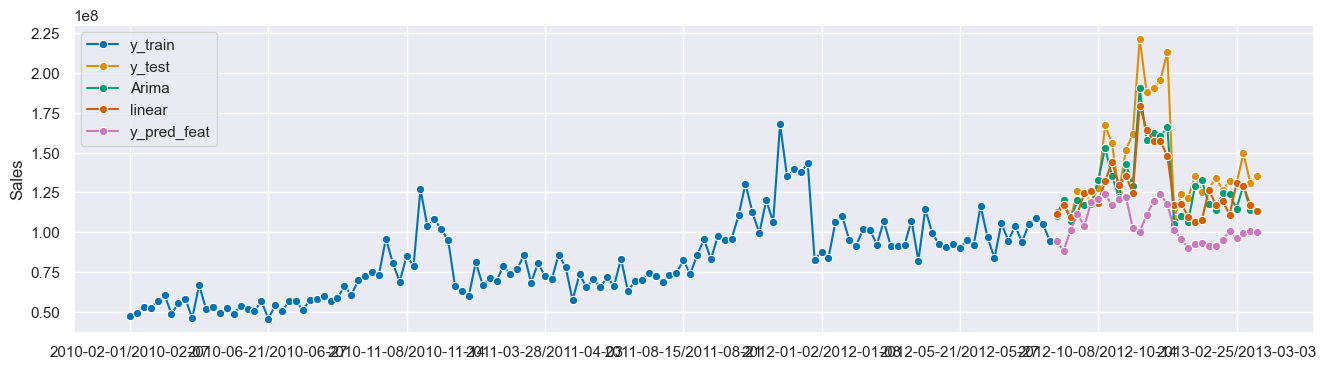

In [141]:
plot_series(y_train, y_test, y_pred, y_pred1 ,y_pred_feat
            ,labels=["y_train", "y_test", "Arima",'linear','y_pred_feat']);

In [ ]:
from sktime.registry import all_estimators

In [ ]:
all_estimators('forecaster',as_dataframe=True)